# Theory Basics: Superposition

This notebook is for beginners! :D Those who are interested in quantum computing but have minimal to no experience. It's <strong>part two</strong> of the Theory Basics series, which is all about the basics of how quantum computing works. Here, I cover <strong>superposition</strong>—the first weird quantum behavior of qubits.

#### Prerequisites:
* familiar with vectors
* [Theory Basics: the Qubit](https://appliedqc.org/2020/01/20/Theory-Basics-The-Qubit.html)

In [18]:
# This may take a few seconds
import numpy as np
import pandas as pd
from qiskit import *  # this imports all of qiskit's sublibraries
import matplotlib.pyplot as plt

# Superposition: the Bloch Sphere

Superposition is a general terms refering to the qubits states that classical bits don't have. Bits can be 0 or 1. Qubits can be 0, 1, and any linear combination of 0 and 1. What do I mean by linear combination? Well, let's visualize it then talk about it.

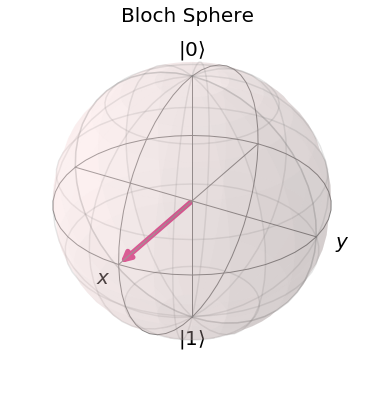

In [21]:
# Visualize a quantum superposition state on the Bloch sphere

visualization.plot_bloch_vector([1,0,0], title="Bloch Sphere")

<strong>The Bloch sphere visualizes the state of the qubit</strong>—including superposition states. The red vector pointing from the center to the surface of the sphere represents the current qubit state while the surface of sphere represents all the possible states of a qubit in general. The poles of the Bloch sphere represent the usual 0 and 1 states we all know and love. The x- and y-axes represent maximum superposition states.



Qubits follow these rules, but with extra features. As we concluded in the previous post, a Hadamard gate does randomly assign a qubit to 0 or 1, but puts the qubit into a 0 AND 1 state. The 0 AND 1 state is the extra feature. Is this mutually exclusive to the 0 state? how about mutally exclusive to 1 state? Is there a NOT 0 AND 1 state?

To visualize the usual 0, 1, and 0 AND 1 states, we use the Bloch sphere. Oh and there are actually <strong>FOUR</strong> different NOT 0 AND 1 states.



# What's Super About Superposition?
Let's cut to the chase. The ability for a qubit to be 0 and 1 simultaneously is called superposition. Since the qubit can be "positions" 0 and 1 simultaneously, I guess physicists thought that was "super."

Generally speaking, a qubit in a superposition refers to any combination of probabilities 100-0, 50-50, 23.79-76.21. However, the most common meaning of "superposition" is a 50-50 split between 0 and 1.

You may wonder, is the qubit **really** in 0 and 1 simultaneously or is something else going on? Short answer, the vast majority of physicists are very confident the qubit **really** is 0 and 1 at the same time. Long answer, take a quantum mechanics course and learn about Bell's inequalities and hidden local variables. As someone who regularly induces atoms into superpositions, I agree with the vast majority of physicists.

A final note on superposition. **What does a superposition look like in real life?** It looks like initializing a qubit (could be an atom, superconducting circuit, photon, etc.) to 0 **or** 1, then manipulating it into a 50-50 superposition then measuring it. The measurement WILL ONLY RETURN A 0 **or** 1. To determine the superposition state of the qubit, many, many cycles of initialization, manipulation, and measurement are done. In the case of a 50-50 superposition. The detector would readout 0 and 1 each ~50% of the time.

In [ ]:
# Initialize a quantum circuit
circuit = QuantumCircuit(1,1)  # the argument (1,1) tells qiskit you want 1 qubit and 1 classical bit
circuit.h(0)  # this method applies the Hadamard gate to the 0th qubit
circuit.measure(0,0)  # this method measures the 0th qubit and stores the outcome in the 0th classical bit

# Visualize the constructed circuit
circuit.draw()

In [ ]:
# Let's use the same circuit and backend we defined in the previous cell
result = execute(circuit, backend, shots=1).result()
# Extract classical bit results
counts = result.get_counts(circuit)
# Show results in histogram
visualization.plot_histogram(counts)

What you're seeing is a subtle, but <strong>IMPORTANT point</strong> about qubits. Yes, they can be simultaneously 50% 0 and 50% 1, but when a qubit is measured, you will only get out 0 <strong>OR</strong> 1—<strong>NOT BOTH</strong>. To determine what probability of 0 and 1 the qubit has, the qubit needs to go through the process of initialization, manipulation and measurement many, many times. (Of course, the qubit is manipulated identically each time.)

Qiskit uses the parameter "shots" to let us easily change the number of times the execution is repeated. Let's try 10000 shots this time.

In [ ]:
# Let's use the same circuit and backend we defined in the previous cell
result = execute(circuit, backend, shots=10000).result()
# Extract classical bit results
counts = result.get_counts(circuit)
# Show results in histogram
visualization.plot_histogram(counts)

THAT looks much better. Nearly 50% of the measurements yield 0 and other 50% of the times yield 1! Exactly how we expect the qubit to behave when using a Hadamard gate.

You may be tempted to think this Hadamard gate is simply a box which randomly assigns the incoming qubit to 0 half the time and 1 the other half of the time. If this were true what would happen if we apply two Hadamard gates in a row? Well, the initial 0 would randomly be assigned 0 or 1, then the 0 or 1 would be randomly assigned to 0 or 1 <em>again</em> leaving the final state in 50% 0 and 50% 1.


Let's highlight the difference between a bit and a qubit. A classical bit is <strong>always</strong> 100% 0 <strong>OR</strong> 1, but never both at the same time. A qubit can both 0 and 1 at the same time. For instance, a qubit can be 55% 0 and 45% 1. A qubit can have <strong>any probability</strong> of being 0 or 1 as long as those probabilities add to one. 12.304985723495% 0 and 87.695014276505% 1 is totally possible.



# Superposition: quantum parallelism
Deutsch-Jozsa algorithm leverages superposition with a deterministic outcome

